In [170]:
import networkx as nx 
import numpy as np 
import matplotlib.pyplot as plt 

def partition(number):
    ## number로 나눌 수 있는 모든 파티션 종류를 리턴
    answer = set() ## 일단 현재 number도 partition 중 하나 이므로 tuple로 넘겨주고 
    answer.add((number, )) 
    for x in range(1, number):## binary partition: increase x and partition y 
        for y in partition(number - x):## new partition of x 
            answer.add(tuple(sorted((x, ) + y)))## like this
    return answer

def list_partition(input_lst, split_size):
    if sum(split_size)==len(input_lst):
        r_lst = [input_lst[sum(split_size[:i-1]):sum(split_size[:i])] for i in range(1, len(split_size)+1)]
        return r_lst
    else:
        print('sum(split_size)!=len(input_lst)')
        return None

def make_random_tree(node_set, level=3):
    ## node set으로부터 random하게 tree를 만듬 
    rG = nx.Graph()    
    ## 만약 시간이 오래 걸린다면, partition에서 시간이 많이 소요되는 것임. 
    ## 각 레벨별로 몇 명의 node가 있을지 정하고 
    level_node_size = [1 for i in range(1, level)]
    for i in range(0, len(node_set)-level):
        level_node_size[np.random.randint(0, len(level_node_size))]+=1
    level_node_size = sorted(level_node_size)
    rG.add_node('l0_u1', level=0) ## 탑노드 
    for each_level, children_size in enumerate(level_node_size):
        each_level = each_level+1
        parent_node_set = [ n[0] for n in rG.node(data=True) if n[1]['level'] == each_level-1]
        children_node_set = [('l{}_u{}'.format(each_level, i), {'level':each_level}) for i in range(0, children_size)]
        rG.add_nodes_from(children_node_set)
        ## children_node_set을 parent_node_set에 맞춰 나누어야 함 
        children_ps = [p for p in partition(len(children_node_set)) if len(p)==len(parent_node_set)]
        children_ps = children_ps[np.random.randint(0, len(children_ps))]
        children_ps = list_partition(children_node_set, children_ps)
        for j, par_n in enumerate(parent_node_set):
            rG.add_star([par_n]+[ c[0] for c in children_ps[j]])
    ## relabel 
    new_node_label = np.random.choice(node_set, len(node_set), replace=False)
    return nx.relabel_nodes(rG, {n: new_n for n, new_n in zip(rG.nodes(), new_node_label)})

def tree_position(inputG):
    ## tree 구조인 graph의 포지션을 만들어줌
    pos_dict = {}
    levels = {n[1]['level'] for n in inputG.nodes(data=True)}
    for i, l in enumerate(range(min(levels), max(levels)+1)):
        nodes = [n for n in inputG.nodes(data=True) if n[1]['level']==l]
        y = 1.0 - (1.0/(len(levels)+1)*(i+1))
        pos_dict.update({n[0]:(1.0/(len(nodes)+1)*(j+1), y) for j, n in enumerate(nodes)})
    return pos_dict

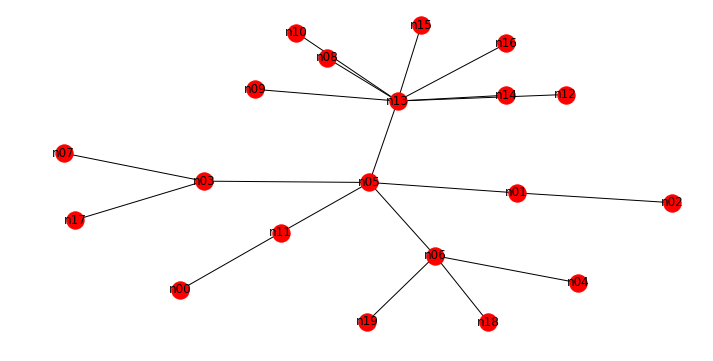

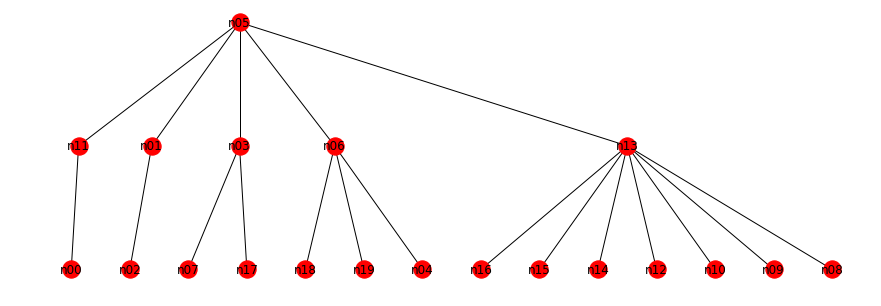

AttributeError: module 'networkx' has no attribute 'to_agraph'

In [45]:
import graphviz

In [52]:
import pygraphviz 

import networkx as nx
from networkx.drawing.nx_agraph import write_dot, graphviz_layout
import matplotlib.pyplot as plt
G = nx.DiGraph()

G.add_node("ROOT")

for i in range(5):
    G.add_node("Child_%i" % i)
    G.add_node("Grandchild_%i" % i)
    G.add_node("Greatgrandchild_%i" % i)

    G.add_edge("ROOT", "Child_%i" % i)
    G.add_edge("Child_%i" % i, "Grandchild_%i" % i)
    G.add_edge("Grandchild_%i" % i, "Greatgrandchild_%i" % i)

# write dot file to use with graphviz
# run "dot -Tpng test.dot >test.png"
write_dot(G,'test.dot')

# same layout using matplotlib with no labels
plt.title('draw_networkx')

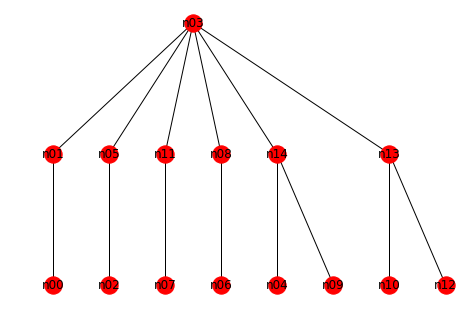

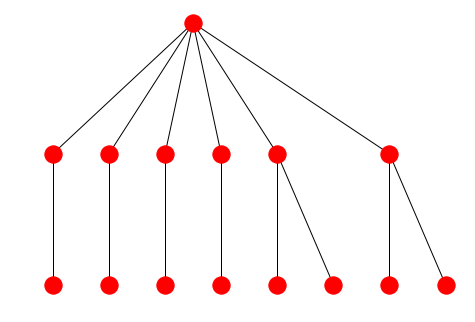

In [61]:
nx.draw(g, pos=nx.drawing.nx_pydot.graphviz_layout(g, prog='dot'), 
        with_labels=False, arrows=True)

In [ ]:
## more better layout 